### Introduction to artificial intelligence

This notebook contains a Script with a implementation of neural network for regression problem.

Author:
    Oscar Hernández Terán
    
Bachelor's Degree:
    Geophysical Engineer

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
import tensorflow as tf
import keras

                          FUNCTIONAL MODEL API                         


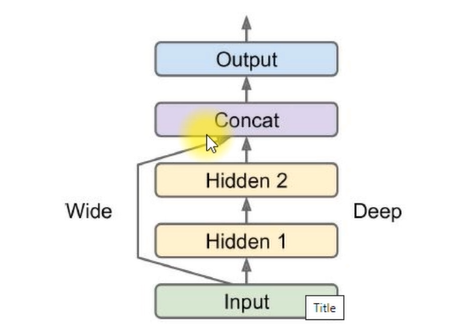

In [3]:
txt = 'FUNCTIONAL MODEL API'
s = txt.center(71)
print(s) 
Image('../Figures/ANN_Func.PNG', width=500)

In [4]:
# Load the data.
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
# List of the names of each matrix.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Data normalization.
X_train_n = X_train_full / 255.0
X_test_n  = X_test  / 255.0

In [7]:
# Split the data into train/validation/test datasets.
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [8]:
# Creation of the network structure.
input_  = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat  = keras.layers.concatenate([input_, hidden2])
output  = keras.layers.Dense(1)(concat)
model   = keras.models.Model(inputs=[input_], outputs=[output])

In [9]:
# Print the summary of the network.
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 28, 30)       870         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 28, 30)       930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [10]:
# Compile the model.
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

In [11]:
# Train the model
model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 6.3605 - mae: 2.0458 - val_loss: 4.4143 - val_mae: 1.7218
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.4528 - mae: 1.7113 - val_loss: 4.1671 - val_mae: 1.6363
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.3107 - mae: 1.6658 - val_loss: 4.0828 - val_mae: 1.6113
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.2432 - mae: 1.6470 - val_loss: 4.0258 - val_mae: 1.6022
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.1859 - mae: 1.6344 - val_loss: 3.9681 - val_mae: 1.5888
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.1210 - mae: 1.6203 - val_loss: 3.9102 - val_mae: 1.5756
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.0624 - mae: 1.6080 - val_loss: 3.8771 - val_mae: 1.5725
Epoch 8/10
1719/1719 [==============================] - 4s 2ms

In [12]:
mae_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 3.9186 - mae: 1.5740


In [13]:
model_history.history

{'loss': [6.360525608062744,
  4.452824592590332,
  4.3107380867004395,
  4.243239879608154,
  4.185866355895996,
  4.121032238006592,
  4.062398433685303,
  4.009734630584717,
  3.966785192489624,
  3.935213804244995],
 'mae': [2.0457825660705566,
  1.7113052606582642,
  1.6658458709716797,
  1.6469906568527222,
  1.6344079971313477,
  1.6203171014785767,
  1.6080182790756226,
  1.5956401824951172,
  1.58560311794281,
  1.5772089958190918],
 'val_loss': [4.41434383392334,
  4.167116641998291,
  4.082827568054199,
  4.0258283615112305,
  3.96813702583313,
  3.910154342651367,
  3.877140998840332,
  3.831686019897461,
  3.7944843769073486,
  3.7521722316741943],
 'val_mae': [1.72175931930542,
  1.6363253593444824,
  1.6113423109054565,
  1.602196216583252,
  1.5887778997421265,
  1.5756473541259766,
  1.5725260972976685,
  1.5504987239837646,
  1.5538772344589233,
  1.5372190475463867]}

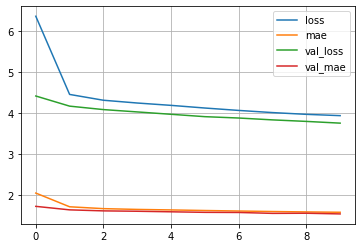

In [14]:
df = pd.DataFrame(data=model_history.history)
df.plot()
plt.grid(b=True)

plt.show()

## Save the model
It is possible to save our neural network for future work, and in the case of networks that require great computational power, to save time.

In [15]:
# Save the model.
model.save('../Checkpoints/Func_ANN.h5')

In [16]:
# We delete the model for check the save.
del model
keras.backend.clear_session()

In [17]:
# We load the model
model = keras.models.load_model('../Checkpoints/Func_ANN.h5')

In [18]:
# We print the summary
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 28, 30)       870         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 28, 30)       930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_1[0][0]                    
                                                                 dense_1[0][0]         

## Using callbacks during trainig
Occasionally, several epochs are held, and the actual delivery takes a couple of hours. That is why it is possible to perform callbacks to specific epochs of the training.

In [19]:
# We Initialize
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
# Create a ANN
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [21]:
# We compile
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [22]:
# Here is where save the model in a specific epochs value
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Checkpoints/Model-{epoch:02d}.h5")

In [23]:
# We train the model with a specifies parameters
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 6.3751 - val_loss: 4.4458
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.4623 - val_loss: 4.1463
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.2704 - val_loss: 4.0226
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.1730 - val_loss: 3.9582
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.1060 - val_loss: 3.8887
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 4.0495 - val_loss: 3.8449
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.0070 - val_loss: 3.8219
Epoch 8/10
1719/1719 [==============================] - 3s 2ms/step - loss: 3.9717 - val_loss: 3.7816
Epoch 9/10
1719/1719 [==============================] - 3s 2ms/step - loss: 3.9465 - val_loss: 3.7819
Epoch 10/10
1719/1719 [==============================] - 3s 2ms/step - loss: 3.925

In [24]:
# We load the model 
model = keras.models.load_model("../Checkpoints/Model-10.h5")

## Best model only
We can save the best model, that is, the best wieghts and bais for the problem.

In [25]:
# Delete the preview model
del model
keras.backend.clear_session()

In [26]:
# Create a ANN
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [27]:
# We compile
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [28]:
# Here, use the callbacks method with the parameter 'save_best_only=True'
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Checkpoints/Best_Model.h5", save_best_only=True)

In [29]:
# Train the best model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 5.7013 - val_loss: 4.3400
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.3851 - val_loss: 4.0961
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.2271 - val_loss: 3.9871
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.1323 - val_loss: 3.9193
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.0638 - val_loss: 3.8522
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 4.0103 - val_loss: 3.8110
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 3.9720 - val_loss: 3.7964
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 3.9418 - val_loss: 3.7543
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 3.9199 - val_loss: 3.7811
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 3.901